In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in csv file
input_file = 'resources/Mia_objects_country.csv'
data = pd.read_csv(input_file, index_col='Unnamed: 0')

data.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accession_number,artist,classification,continent,country,creditline,culture,dated,department,id,...,provenance,room,style,title,RBL,RB,X,loan,accession_year,tableau_country
0,10.1,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c.1888-89,Prints and Drawings,0,...,"[Art dealer, London, acquired from ""an old hou...",Not on View,19th century,"Air, from the series The Four Elements",NaN,NaN,NaN,NaN,10,United Kingdom
1,10.2,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c. 1888-89,Prints and Drawings,1,...,"[Art dealer, London, acquired from ""an old hou...",Not on View,19th century,"Earth, from the series The Four Elements",NaN,NaN,NaN,NaN,10,United Kingdom
2,10.3,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c. 1888-89,Prints and Drawings,2,...,"[Art dealer, London, acquired from ""an old hou...",G352,19th century,"Fire, from the series The Four Elements",NaN,NaN,NaN,NaN,10,United Kingdom
3,10.4,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c. 1888-89,Prints and Drawings,3,...,"[Art dealer, London, acquired from ""an old hou...",Not on View,19th century,"Water, from the series The Four Elements",NaN,NaN,NaN,NaN,10,United Kingdom
4,13.29,Walter Shirlaw,Drawings,North America,United States,Gift of Mrs. Florence M. Shirlaw,NaN,19th century,Prints and Drawings,4,...,NaN,Not on View,19th century,Montana Indian Reservation I,NaN,NaN,NaN,NaN,13,United States


# Data Analysis

## Country Breakdown
- Which country accounts for the most objects, the least?
- What is the median number of gifts per country?
- What kinds of bins can break down the numbers to best filter the data?


In [29]:
# Group dataframe by country
collection_country = data.groupby(['country'], as_index=False)['accession_number'].count().rename(columns = {'accession_number':'count_objects'})
collection_country.head()

,country,count_objects
0,Admiralty Islands,2
1,Afghanistan,54
2,Afghanistan or Uzbekistan,1
3,Africa,2
4,Albania,1


In [32]:
# Most and least values
most = collection_country.count_objects.max()
least = collection_country.count_objects.min()
median = collection_country.count_objects.median()

print(str(most) + "," + str(least))
print('Median: ' + str(median))

27404,1
Median: 2.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(ny.price, bins=100, range=(0, 1000))

In [62]:
test = collection_country[collection_country['count_objects'] < 3]
two_country = test[test['count_objects'] > 1]
two_country.count()

country          64
count_objects    64
dtype: int64

In [63]:
two_country.country.unique()

array(['Admiralty Islands', 'Africa', 'Armenia or Syria', 'Azerbaijan',
       'China or India', 'Cook Islands', 'Croatia', 'Czechoslovakia (?)',
       "Côte d'Ivoire or Liberia", 'Dagestan',
       'East Germany-Austria-Hungary', 'England and Switzerland',
       'England or the Netherlands', 'France / Austria',
       'France and Switzerland', 'France?', 'Germany (Saxony)',
       'Germany (possibly)', 'Germany (probably)', 'Germany or Austria',
       'Iran or India', 'Isle of Man', 'Israel (probably)',
       'Italy or France', 'Italy or Sardinia', 'Italy or Spain',
       'Jamaica', 'Kazakhstan', 'Laos and North Vietnam',
       'Laos or Vietnam', 'Lombok Island', 'Macedonia', 'Malta',
       'Marquesas Islands', 'Morocco (?)', 'Netherlands / Flanders',
       'New Caledonia', 'Nigeria or Benin', 'Northern Italy',
       'Northern Vietnam', 'Papua', 'Peru (?)', 'Phillipines',
       'Ptolemaic Egypt', 'Rapa Nui (Easter Island)',
       'Republic of South Sudan', 'Russia (probably

In [60]:
collection_country.count()

country          447
count_objects    447
dtype: int64

# Data Analysis

## Year Breakdown
- In which year were the most objects gifted, the least?
- What is the median number of gifts per year?
- What years were important for Mia in terms of large gifts?

In [23]:
# Group dataframe by year
collection_year = data.groupby(['accession_year'], as_index=False)['accession_number'].count().rename(columns = {'accession_number':'count_objects'})
collection_year.head()


,accession_year,count_objects
0,6,2
1,8,2
2,9,105
3,10,5
4,11,2


In [39]:
# Most and least values
most_y = collection_year.count_objects.max()
least_y = collection_year.count_objects.min()
median_y = collection_year.count_objects.median()

print(str(most_y) + ", " + str(least_y) + ', ' + str(median_y))

8197, 2, 552.0, 871.433628318584


In [43]:
# Pull out all years with more than 552 objects
most_df = collection_year[collection_year['count_objects'] > 552]
most_df.count()

accession_year    56
count_objects     56
dtype: int64

Text(0, 0.5, 'Number of Objects')

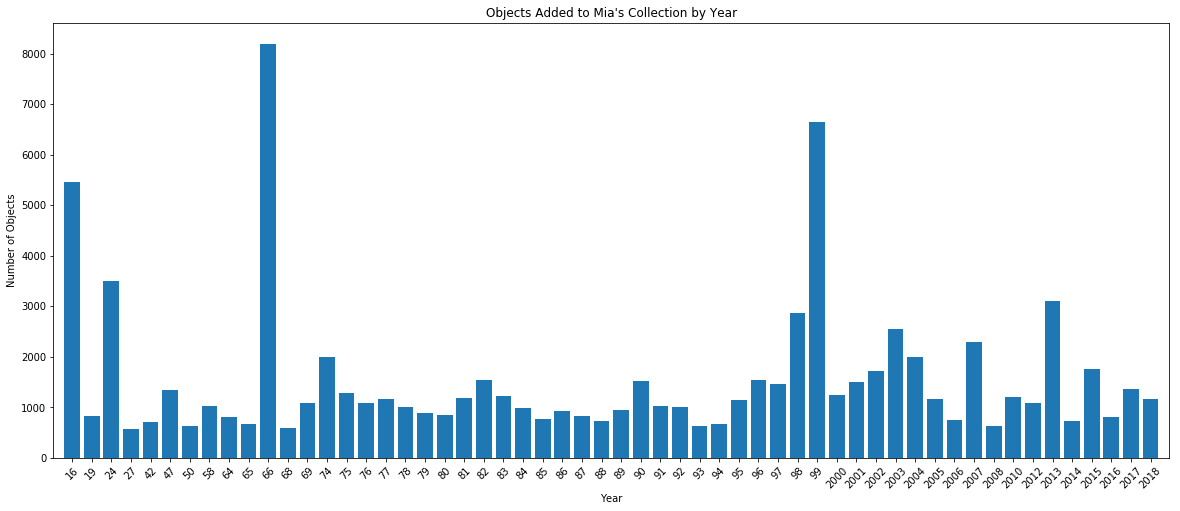

In [46]:
# Create handles from accession_year values
handles = most_df['accession_year'].values

# Build the bar chart
plt.figure(figsize=(20,8))
x_axis = np.arange(0,len(handles))

plt.bar(x_axis, most_df['count_objects'])
plt.margins(x=0.01)
plt.xticks(x_axis, labels=handles, rotation=45)
plt.title("Objects Added to Mia's Collection by Year")
plt.xlabel("Year")
plt.ylabel('Number of Objects')

In [50]:
# Pull out all years with less than 552 objects
least_df = collection_year[collection_year['count_objects'] < 552]
least_df.count()

accession_year    56
count_objects     56
dtype: int64

Text(0, 0.5, 'Number of Objects')

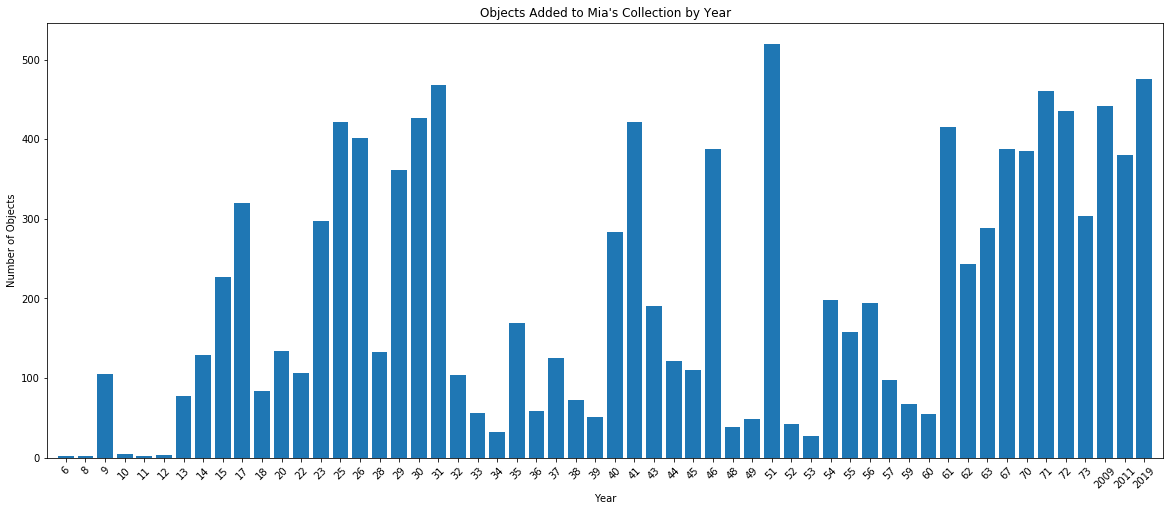

In [51]:
# Create handles from accession_year values
handles = least_df['accession_year'].values

# Build the bar chart
plt.figure(figsize=(20,8))
x_axis = np.arange(0,len(handles))

plt.bar(x_axis, least_df['count_objects'])
plt.margins(x=0.01)
plt.xticks(x_axis, labels=handles, rotation=45)
plt.title("Objects Added to Mia's Collection by Year")
plt.xlabel("Year")
plt.ylabel('Number of Objects')

In [55]:
# Pull out top 10 years for gifts
collection_year.sort_values('count_objects', ascending=False).head(10)

,accession_year,count_objects
59,66,8197
92,99,6651
9,16,5457
17,24,3491
106,2013,3098
91,98,2871
96,2003,2555
100,2007,2292
67,74,2003
97,2004,2001


# Data Visualization

- How many objects are gifted per year
- How many objects are from each country
- See how the number of objects by country changes over time

In [3]:
collection_year = data.groupby(['accession_year'], as_index=False)['accession_number'].count()
collection_year.head()

,accession_year,accession_number
0,6,2
1,8,2
2,9,105
3,10,5
4,11,2


In [23]:
len(collection_year['accession_year'].values)

113

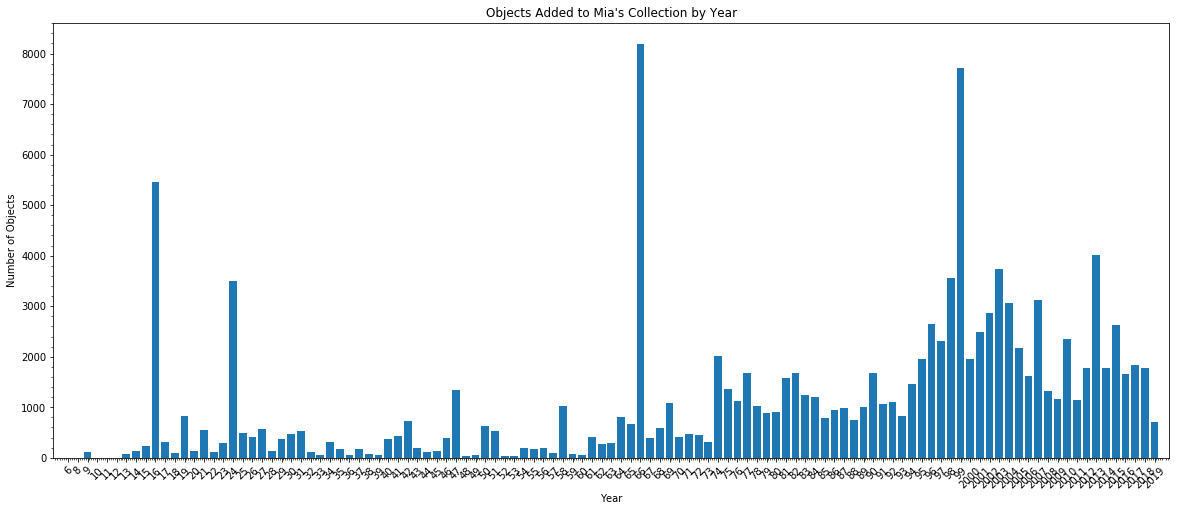

In [25]:
# Create handles from accession_year values
handles = collection_year['accession_year'].values

# Build the bar chart
plt.figure(figsize=(20,8))
x_axis = np.arange(0,len(handles))

plt.bar(x_axis, collection_year['accession_number'])
plt.margins(x=0.01)
plt.minorticks_on()
plt.xticks(x_axis, labels=handles, rotation=45)
plt.title("Objects Added to Mia's Collection by Year")
plt.xlabel("Year")
plt.ylabel('Number of Objects')

# # Save the Figure
# plt.savefig("Collection_by_Year.png")


# Show the Figure
plt.show()

In [7]:
collection_country = data.groupby(['tableau_country'], as_index=False)['accession_number'].count()
collection_country.head()

,tableau_country,accession_number
0,Afghanistan,58
1,Afghanistan Or Pakistan,1
2,Afghanistan Or Uzbekistan,1
3,Africa,5
4,Albania,1


In [8]:
# Pull top 100 countries to chart
collection_country_top = collection_country.nlargest(50, 'accession_number')
collection_country_top.head()

,tableau_country,accession_number
409,United States,35945
116,France,17751
208,Japan,11218
51,China,9880
407,United Kingdom,9128


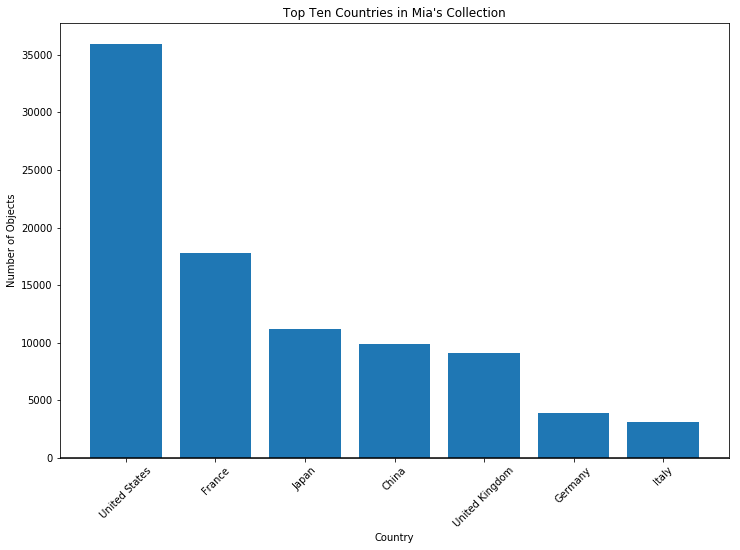

In [10]:
# Create handles from country values
handles = collection_country_top['tableau_country'].values

# Only pull top 7 values
# Build the bar chart
plt.figure(figsize=(12,8))
x_axis = np.arange(0,7)

plt.bar(x_axis, collection_country_top['accession_number'][0:7])
plt.axhline(color="black")
plt.xticks(x_axis, labels=handles[0:7], rotation=45)
plt.title("Top Ten Countries in Mia's Collection")
plt.xlabel("Country")
plt.ylabel('Number of Objects')

# # Save the Figure
# plt.savefig("Tumor_Growth.png")


# Show the Figure
plt.show()

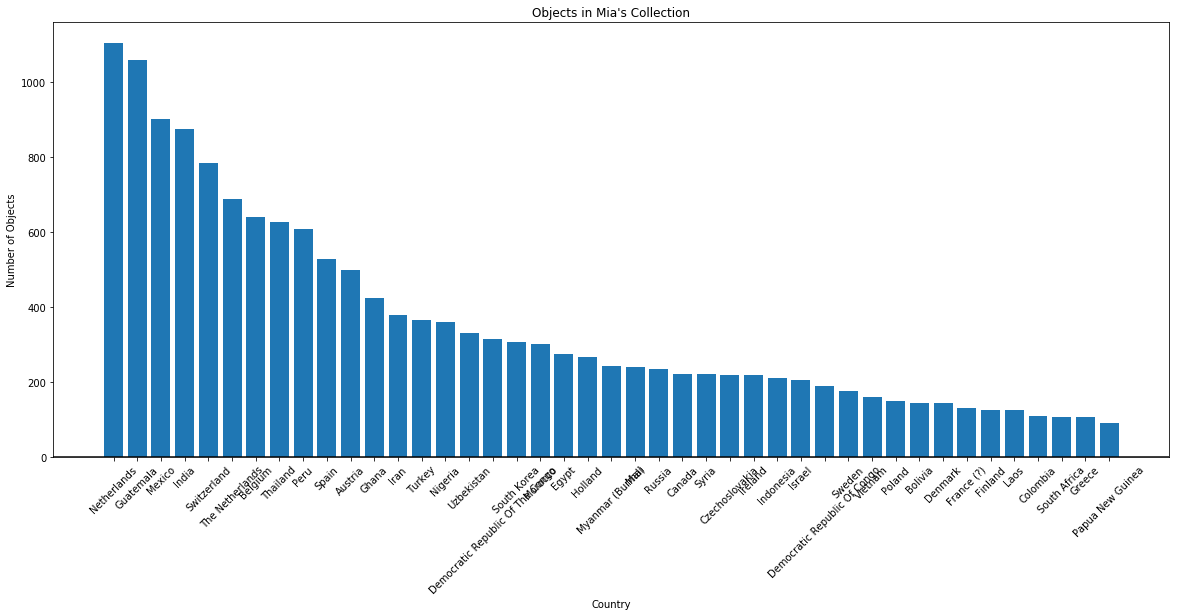

In [12]:
# Create handles from country values
handles = collection_country_top['tableau_country'].values

# Build the bar chart
plt.figure(figsize=(20,8))
x_axis = np.arange(0,43)

plt.bar(x_axis, collection_country_top['accession_number'][7:50])
plt.axhline(color="black")
plt.xticks(x_axis, labels=handles[7:50], rotation=45)
plt.title("Objects in Mia's Collection")
plt.xlabel("Country")
plt.ylabel('Number of Objects')

# # Save the Figure
# plt.savefig("Tumor_Growth.png")


# Show the Figure
plt.show()